<a href="https://colab.research.google.com/github/divakar9819/C-data-structer/blob/master/shallow_net_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.1.9
tensorflow==1.15.0
tensorflow-datasets==2.0.0
tensorflow-estimator==1.15.1
tensorflow-gan==2.0.0
tensorflow-hub==0.7.0
tensorflow-metadata==0.21.1
tensorflow-privacy==0.2.2
tensorflow-probability==0.7.0


In [3]:
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 120kB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
     |████████████████████████████████| 3.8MB 50.5MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [5]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

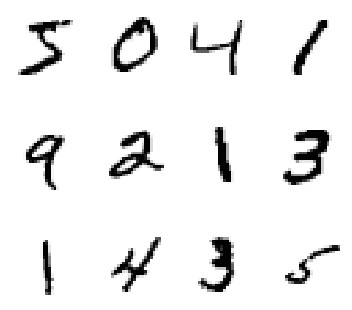

In [9]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
X_valid.shape

(10000, 28, 28)

In [11]:
y_valid.shape

(10000,)

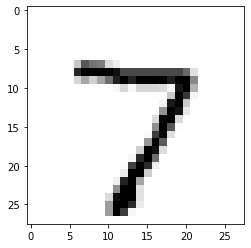

In [12]:
plt.imshow(X_valid[0], cmap='Greys')

In [13]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
y_valid[0]

7

Processing Data

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [17]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [19]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
(64*784)

50176

In [0]:
(64*784)+64

50240

In [0]:
(64*784)+10

50186

## Configure **model**

In [0]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

## Train

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0935 - acc: 0.1045 - val_loss: 0.0927 - val_acc: 0.1057
Epoch 2/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0922 - acc: 0.1109 - val_loss: 0.0918 - val_acc: 0.1164
Epoch 3/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0914 - acc: 0.1244 - val_loss: 0.0911 - val_acc: 0.1310
Epoch 4/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0908 - acc: 0.1392 - val_loss: 0.0906 - val_acc: 0.1482
Epoch 5/200
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0904 - acc: 0.1545 - val_loss: 0.0901 - val_acc: 0.1628
Epoch 6/200
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0900 - acc: 0.1704 - val_loss: 0.0897 - val_acc: 0.1809
Epoch 7/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0896 - acc: 0.1877 - val_l

In [26]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0282 - acc: 0.8590


[0.028211937594413757, 0.859]

In [0]:
valid_0 = X_valid[0].reshape(1, 784)


In [31]:

model.predict(valid_0)


array([[5.7871342e-03, 1.3557703e-03, 1.0120039e-03, 6.2158001e-03,
        6.2417118e-03, 1.0718857e-02, 4.5787048e-04, 9.3212253e-01,
        4.7469381e-03, 3.1341344e-02]], dtype=float32)

In [32]:

model.predict_classes(valid_0)

array([7])